Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('titanic.csv',encoding='latin1')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Check for any missing values
print("Checking for missing values:")
df.isnull().sum()

Checking for missing values:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# impute age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)

In [11]:
# Impute  Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In [14]:
# Replace 'Sex' to binary values
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [15]:
# mapping dictionary
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Map 'Embarked' to numeric values
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [17]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.45,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,1
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


Data Visualization

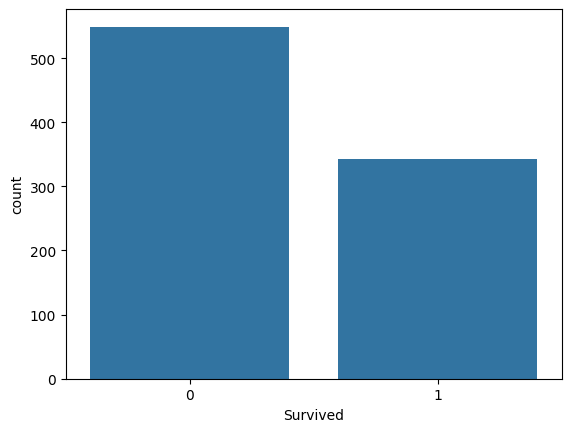

In [21]:

sns.countplot(x='Survived', data=df)
plt.show()

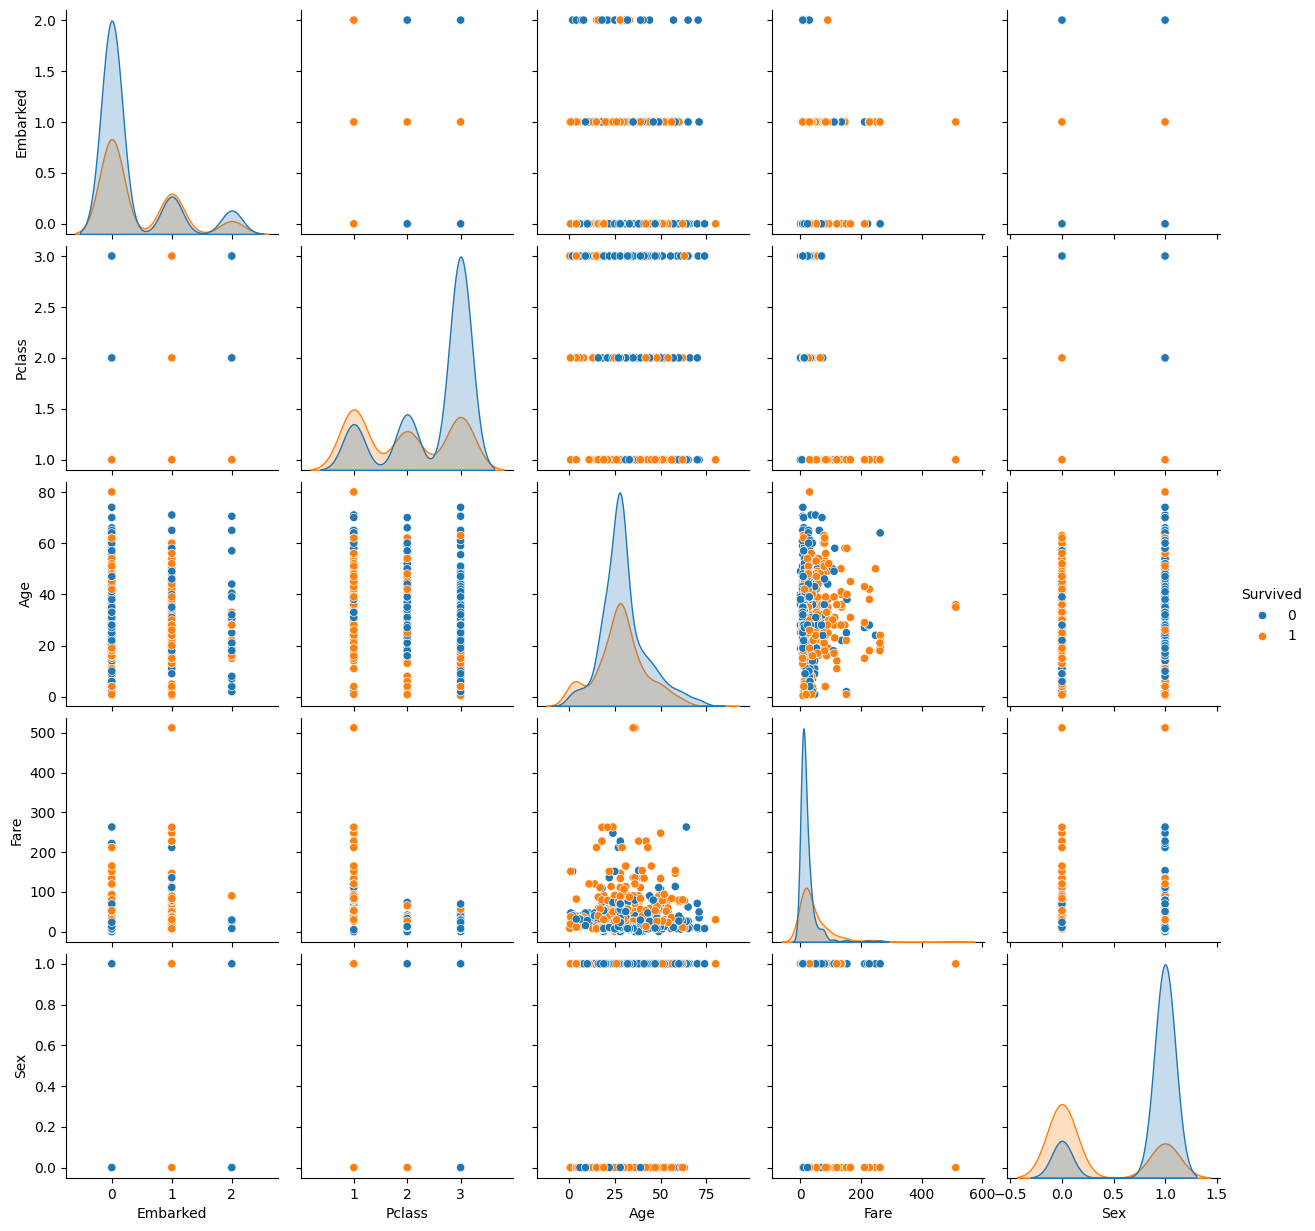

In [22]:
# Select features
imp_features = ['Survived','Embarked', 'Pclass', 'Age', 'Fare', 'Sex']

# Create pairplot
sns.pairplot(df[imp_features], hue='Survived')
plt.show()


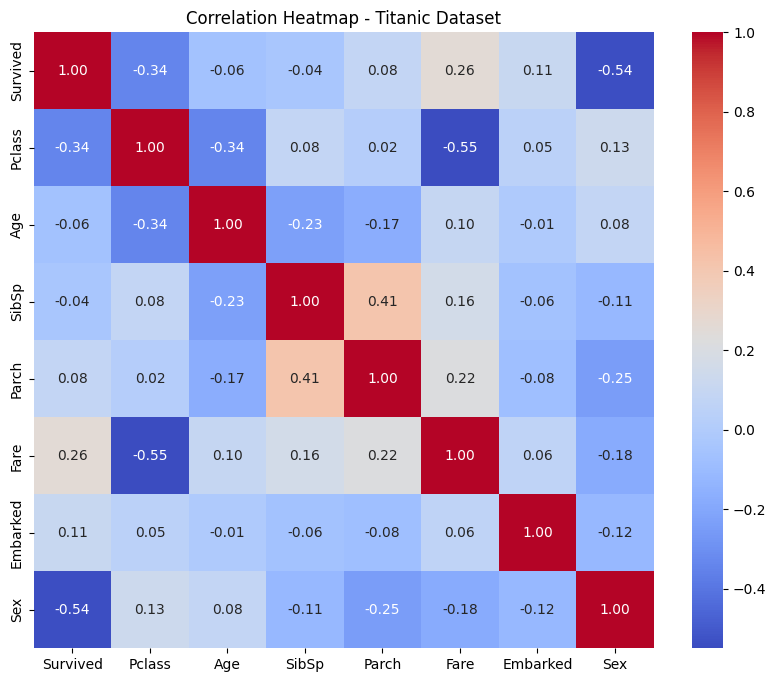

In [23]:
num_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Sex']

# Calculate correlation matrix
cor_matrix = df[num_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()

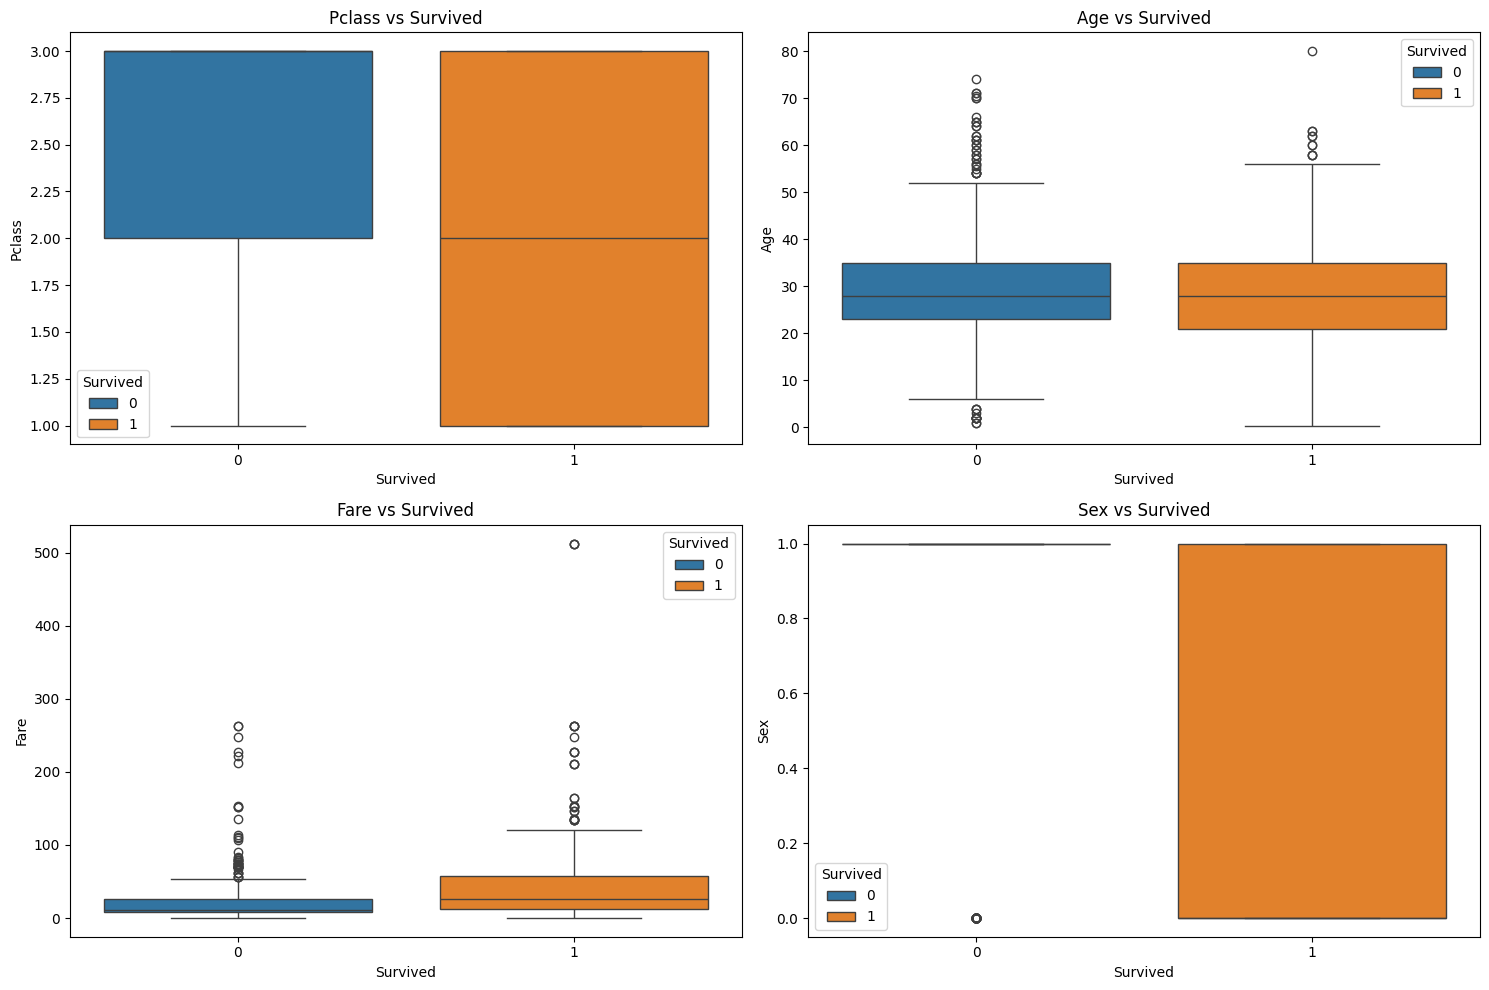

In [25]:

imp_features = ['Pclass', 'Age', 'Fare', 'Sex']

plt.figure(figsize=(15, 10))

m = 1
for feature in imp_features:
    plt.subplot(2, 2, m)
    sns.boxplot(data=df, y=feature, x='Survived', hue='Survived')
    plt.title(f'{feature} vs Survived')
    m += 1

plt.tight_layout()
plt.show()

In [37]:
# Descriptive statistics
print(df.describe())

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    0.361392  
std      1.102743    0.806057   49.693429    0.635673  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.000000  
50%      0.000000    0.000000   1

In [26]:
# Select features and target variable
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X = df[features]
y = df['Survived']

In [27]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict on test set
y_pred = model.predict(X_test)

In [30]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.13
R^2 Score: 0.44


In [31]:
# Convert predictions to binary (0 or 1) based on a threshold
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
accuracy_percentage = accuracy * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 77.65%


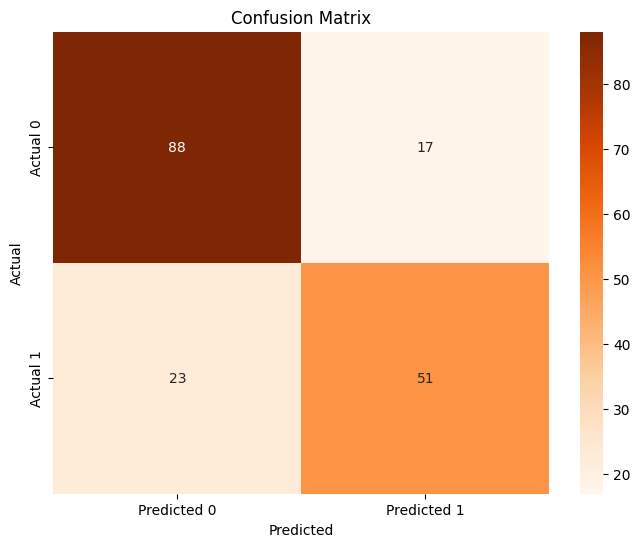

In [33]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Probability Theory

In [34]:
# Probability of survival by gender
survival_prob_gender = df.groupby('Sex')['Survived'].mean()
print("Probability of survival by gender:")
print(survival_prob_gender)

Probability of survival by gender:
Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


In [35]:
# Probability of survival by class
survival_prob_class = df.groupby('Pclass')['Survived'].mean()
print("\nProbability of survival by class:")
print(survival_prob_class)


Probability of survival by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [36]:
# Probability of survival by embarked
survival_prob_embarked = df.groupby('Embarked')['Survived'].mean()
print("\nProbability of survival by embarkation point:")
print(survival_prob_embarked)


Probability of survival by embarkation point:
Embarked
0    0.339009
1    0.553571
2    0.389610
Name: Survived, dtype: float64
